In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [38]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

In [39]:
y,y1

(array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
         8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
         9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
         9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
         9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
         9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
         9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
         9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
         9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
         9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
         9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
         9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
         9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
         9.87667553,  9.86013297,  9.84252604,  9.8

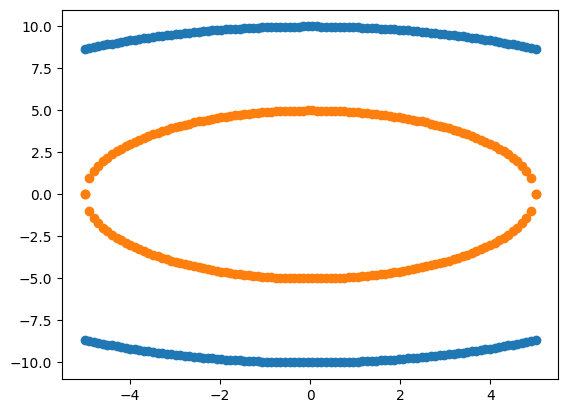

In [40]:
plt.scatter(x,y)
plt.scatter(x1,y1)

In [41]:
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1,df2])
df.head(5)

X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0

In [42]:
X = df.iloc[:, :2]  
y = df.Y

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=17)

### Custom Polynomial Kernel

In [44]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

X1       X2  Y  X1_Square  X2_Square      X1*X2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

In [45]:
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=17)

In [46]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',color='Y')
fig.show()

In [47]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2', color='Y')
fig.show()

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[49  0]
 [ 0 51]]


In [51]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[49  0]
 [ 0 51]]


In [52]:
from sklearn.svm import SVC
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred = poly.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[49  0]
 [ 0 51]]


In [53]:
from sklearn.svm import SVC
sig = SVC(kernel='sigmoid')
sig.fit(X_train,y_train)
y_pred = sig.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[49  0]
 [ 0 51]]
